## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../Data-Mining-Project')
from src.utils import central_tendances, calculate_quartiles, histogram_plot, box_plot, correlation_plots

## Load Dataset

In [3]:
static_df = pd.read_csv("../data/raw/static_dataset.csv", index_col=0)

In [4]:
static_df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


## Data Exploration

In [5]:
static_df.shape

(885, 14)

In [6]:
static_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 103.7+ KB


We can notice that the type of the column "P" is an "object" which is not suitable due to its flexibility in handling various types of data. In fact changing the type of the column to "float" is more appropriate since we can ensure doing all the math and statistics without struggling

In [7]:
# The 'errors' parameter set to 'coerce' will convert non-numeric values to NaN.
static_df['P'] = pd.to_numeric(static_df['P'], errors='coerce')

static_df['P'].dtype

dtype('float64')

In [8]:
static_df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,883.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,14.555266,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,21.930990,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,10.700000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


In [9]:
for col in static_df.columns:
    column_name = col
    column_type = static_df[col].dtype
    num_unique_values = static_df[col].nunique()
    num_missing_values = static_df[col].isnull().sum()

    description = (
        f'Column name: {column_name}\n'
        f'Column type: {column_type}\n'
        f'Number of unique values: {num_unique_values}\n'
        f'Number of missing values: {num_missing_values}\n'
    )

    print(description)

Column name: N
Column type: int64
Number of unique values: 61
Number of missing values: 0

Column name: P
Column type: float64
Number of unique values: 92
Number of missing values: 2

Column name: K
Column type: int64
Number of unique values: 63
Number of missing values: 0

Column name: pH
Column type: float64
Number of unique values: 107
Number of missing values: 0

Column name: EC
Column type: float64
Number of unique values: 71
Number of missing values: 0

Column name: OC
Column type: float64
Number of unique values: 68
Number of missing values: 1

Column name: S
Column type: float64
Number of unique values: 153
Number of missing values: 0

Column name: Zn
Column type: float64
Number of unique values: 70
Number of missing values: 0

Column name: Fe
Column type: float64
Number of unique values: 387
Number of missing values: 0

Column name: Cu
Column type: float64
Number of unique values: 166
Number of missing values: 1

Column name: Mn
Column type: float64
Number of unique values: 42

In [10]:
for col in static_df.columns:
    mean, median, mode = central_tendances(static_df[col])
    print(f"Statistics for column {col} :\n"
        f"  Mean: {mean}\n"
        f"  Median: {median}\n"
        f"  Mode: {', '.join(map(str, mode)) if mode else 'No mode found'}")


Statistics for column N :
  Mean: 246.99774011299436
  Median: 257.0
  Mode: 207
Statistics for column P :
  Mean: nan
  Median: 8.1
  Mode: 8.3
Statistics for column K :
  Mean: 501.33898305084745
  Median: 475.0
  Mode: 444
Statistics for column pH :
  Mean: 7.511954802259897
  Median: 7.5
  Mode: 7.5
Statistics for column EC :
  Mean: 0.5439209039548021
  Median: 0.55
  Mode: 0.62, 0.53
Statistics for column OC :
  Mean: nan
  Median: 0.59
  Mode: 0.88
Statistics for column S :
  Mean: 7.545807909604521
  Median: 6.64
  Mode: 5.13, 4.22
Statistics for column Zn :
  Mean: 0.4687231638418072
  Median: 0.36
  Mode: 0.28
Statistics for column Fe :
  Mean: 4.1267570621469005
  Median: 3.56
  Mode: 6.32
Statistics for column Cu :
  Mean: nan
  Median: 0.93
  Mode: 1.25
Statistics for column Mn :
  Mean: 8.653615819209053
  Median: 8.344999999999999
  Mode: 7.54
Statistics for column B :
  Mean: 0.5934237288135585
  Median: 0.415
  Mode: 0.34
Statistics for column OM :
  Mean: 1.0637179661

In [11]:
for col in static_df.columns:
    Min,Q1,Q2,Q3,Max= calculate_quartiles(static_df[col])
    print(f"Quartiles of column {col} :\n"
        f"  Min: {Min} | Q1: {Q1} |  Q2: {Q2} | Q3: {Q3} | Max: {Max}\n")
        # f"  Q1: {Q1}\n"
        # f"  Q2: {Q2}\n"
        # f"  Q3: {Q3}\n"
        # f"  Max: {Max}")

Quartiles of column N :
  Min: 6 | Q1: 201 |  Q2: 257 | Q3: 307 | Max: 383

Quartiles of column P :
  Min: 2.9 | Q1: 6.8 |  Q2: 8.1 | Q3: 10.7 | Max: 125.0

Quartiles of column K :
  Min: 11 | Q1: 412 |  Q2: 475 | Q3: 581 | Max: 1560

Quartiles of column pH :
  Min: 0.9 | Q1: 7.35 |  Q2: 7.5 | Q3: 7.64 | Max: 11.15

Quartiles of column EC :
  Min: 0.1 | Q1: 0.43 |  Q2: 0.55 | Q3: 0.64 | Max: 0.95

Quartiles of column OC :
  Min: 0.1 | Q1: 0.38 |  Q2: 0.59 | Q3: 0.78 | Max: 24.0

Quartiles of column S :
  Min: 0.64 | Q1: 4.7 |  Q2: 6.64 | Q3: 8.75 | Max: 31.0

Quartiles of column Zn :
  Min: 0.07 | Q1: 0.28 |  Q2: 0.36 | Q3: 0.47 | Max: 42.0

Quartiles of column Fe :
  Min: 0.21 | Q1: 2.05 |  Q2: 3.56 | Q3: 6.32 | Max: 44.0

Quartiles of column Cu :
  Min: 0.09 | Q1: 0.63 |  Q2: 0.93 | Q3: 1.25 | Max: 3.02

Quartiles of column Mn :
  Min: 0.11 | Q1: 6.21 |  Q2: 8.35 | Q3: 11.48 | Max: 31.0

Quartiles of column B :
  Min: 0.06 | Q1: 0.27 |  Q2: 0.42 | Q3: 0.61 | Max: 2.82

Quartiles of c

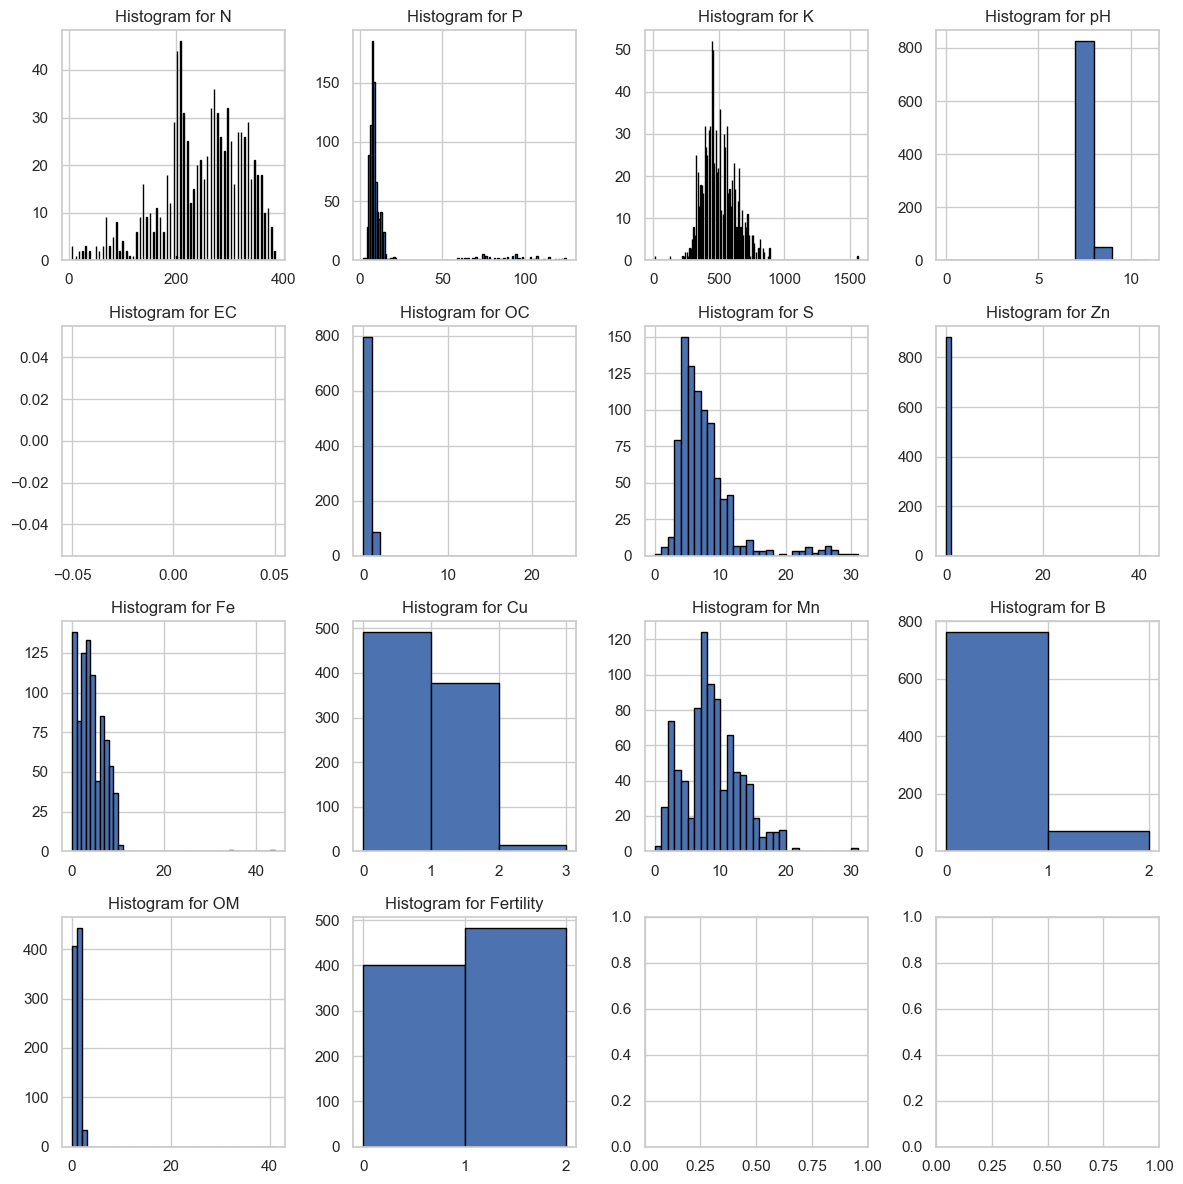

In [12]:
histogram_plot(static_df)

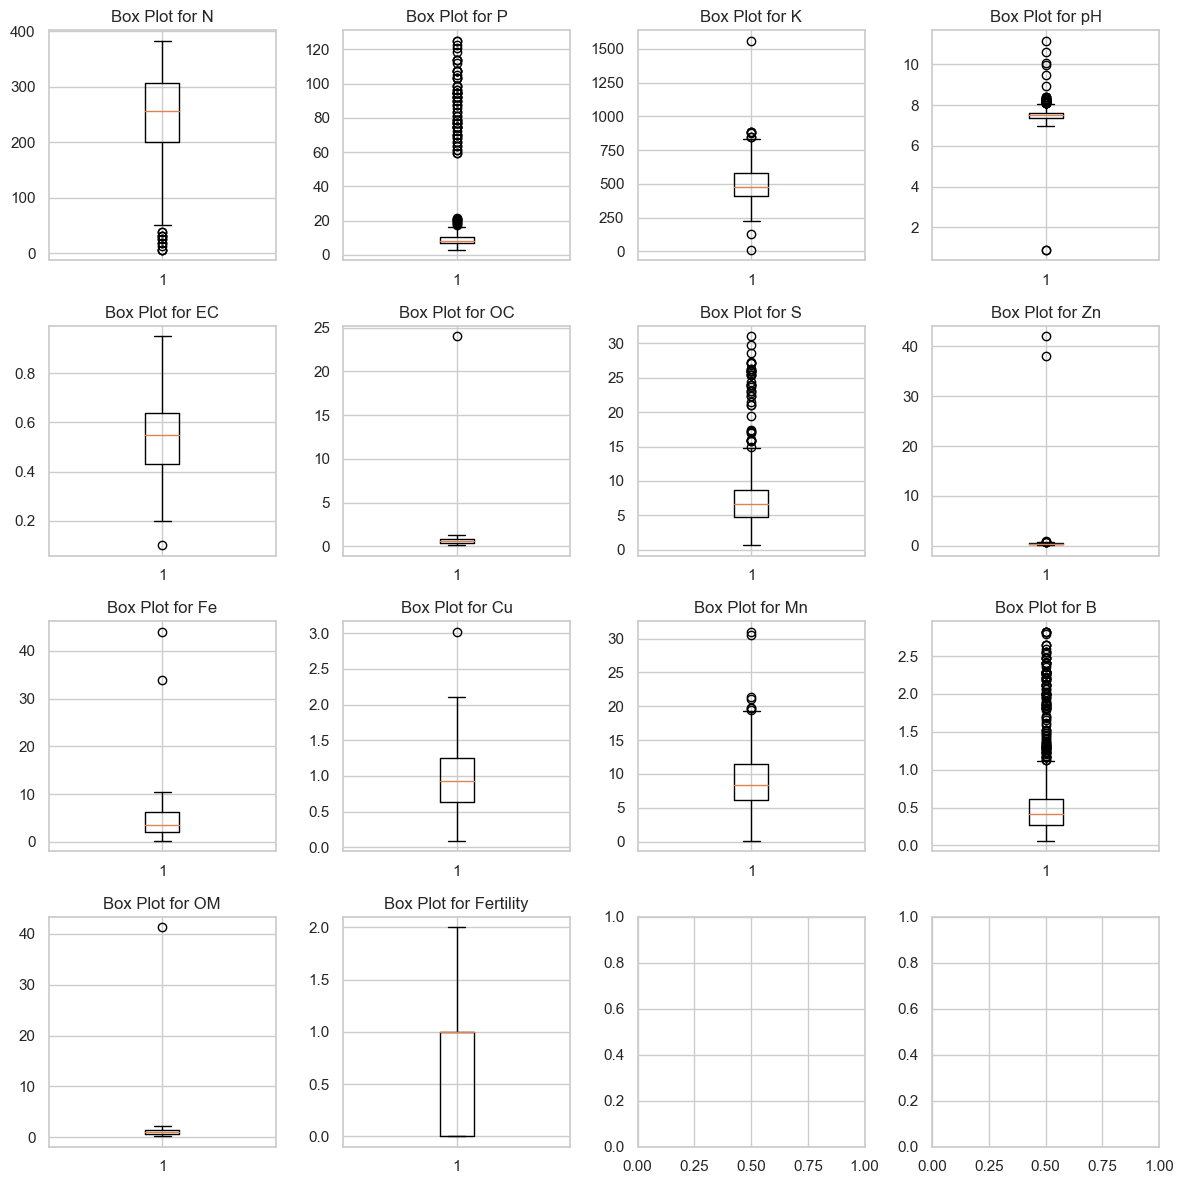

In [13]:
box_plot(static_df)

c:\Users\HI\My-Github\Data-Mining-Project\env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


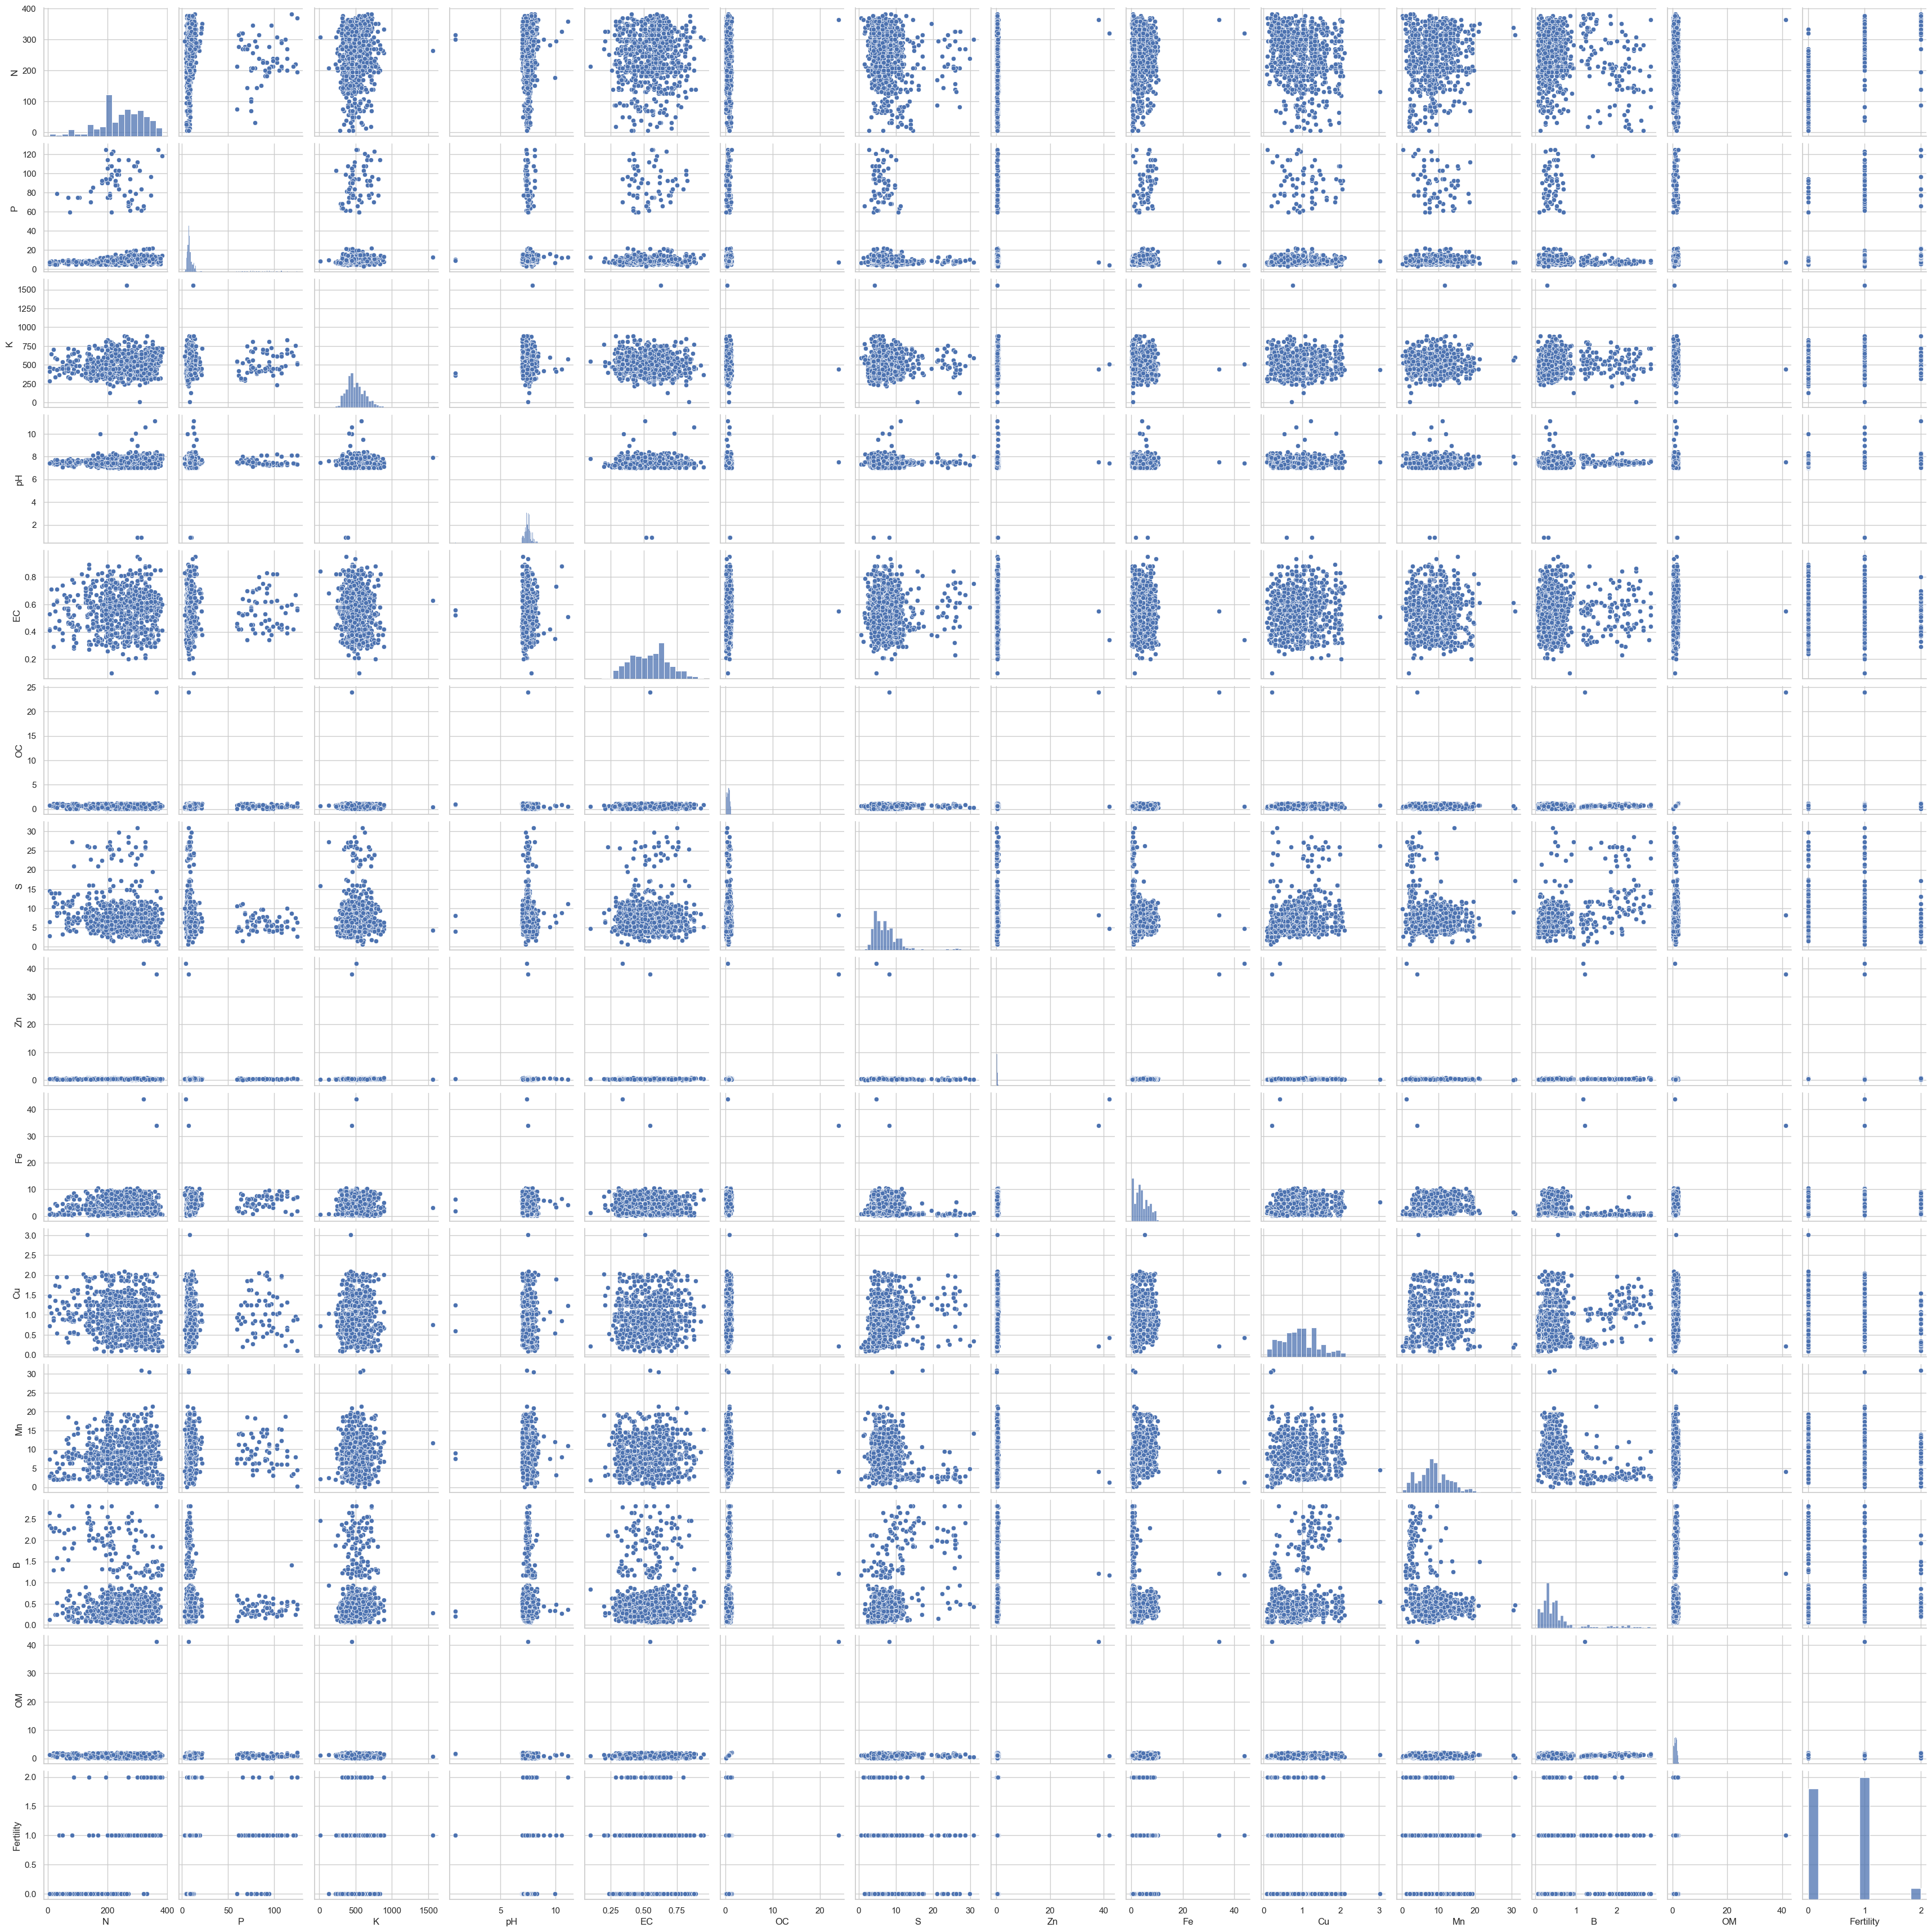

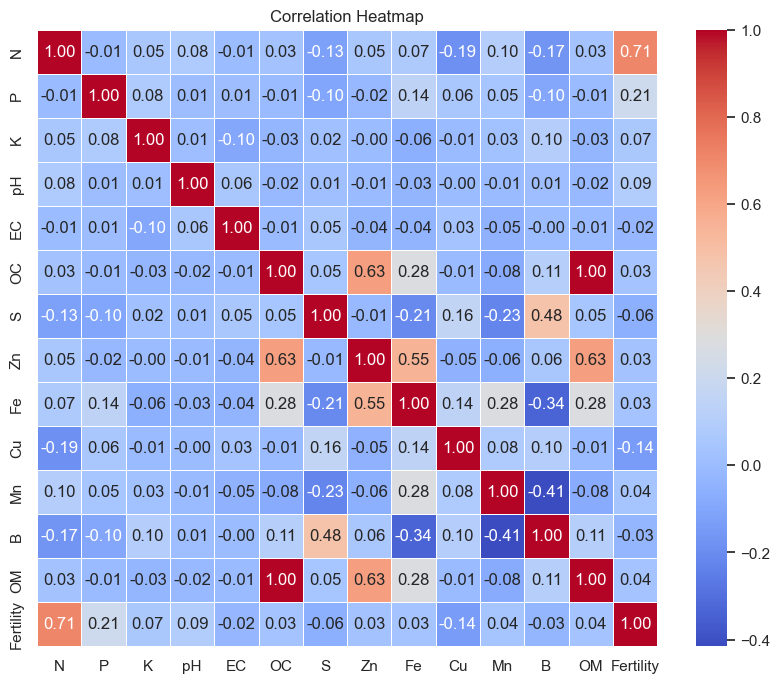

In [23]:
correlation_plots(static_df)
